# Exploaratory Data Analysis

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer, SimpleImputer, IterativeImputer
import sys
import os
sys.path.append(os.path.abspath('../scripts'))
from load_data import load_data
from utils import missing_values_table, rename_column
from utils import * 

In [8]:
# Load data
df = load_data()
df = rename_column(df)
df.shape

Successfully loaded the data
renamed


(150001, 55)

In [70]:
df.tail()

,Bearer Id,Start,Start ms,End,End ms,Dur. (s),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms),Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
149996,7.277826e+18,4/29/2019 7:28,451.0,4/30/2019 6:02,214.0,81230.0,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,32.0,0.0,52.0,65.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,42376.0,41915.0,81230763.0,Apple,Apple iPhone 8 Plus (A1897),NaN,NaN,NaN,NaN,NaN,NaN,223.0,229.0,3.464974e+06,52091.00000,9.967603e+06,2.817311e+06,5.763900e+04,633237.00000,1.619167e+07,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,57628851.0,574175259.0
149997,7.349883e+18,4/29/2019 7:28,483.0,4/30/2019 10:41,187.0,97970.0,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,27.0,2.0,23.0,54.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,17264.0,16759.0,97970704.0,Apple,Apple iPhone Se (A1723),NaN,NaN,NaN,NaN,NaN,NaN,105.0,102.0,2.344568e+06,7613.00000,2.229420e+06,2.185941e+06,1.954414e+06,167304.00000,1.387723e+07,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,39135081.0,666648844.0
149998,1.311448e+19,4/29/2019 7:28,283.0,4/30/2019 10:46,810.0,98249.0,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,43.0,6.0,43.0,47.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,25003.0,28640.0,98249527.0,Apple,Apple iPhone Xs (A2097),NaN,NaN,NaN,NaN,NaN,NaN,104.0,108.0,1.245845e+06,14394.00000,3.850890e+06,2.734579e+06,1.525734e+06,532543.00000,2.266051e+07,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,34912224.0,592786405.0
149999,1.311448e+19,4/29/2019 7:28,696.0,4/30/2019 10:40,327.0,97910.0,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,37.0,5.0,34.0,37.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,13405.0,34088.0,97910631.0,Huawei,Huawei Fig-Lx1,NaN,NaN,NaN,NaN,NaN,NaN,43.0,82.0,8.015470e+05,21562.00000,4.189773e+06,3.567494e+06,2.228270e+06,622644.00000,8.817106e+06,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,29626096.0,371895920.0
150000,NaN,None,NaN,None,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.795322e+06,32928.43438,5.750753e+06,2.056542e+06,1.791729e+06,467373.44194,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,NaN,NaN


## EDA


In [4]:
df.dtypes

Bearer Id                                   float64
Start                                        object
Start ms                                    float64
End                                          object
End ms                                      float64
Dur. (s)                                    float64
IMSI                                        float64
MSISDN/Number                               float64
IMEI                                        float64
Last Location Name                           object
Avg RTT DL (ms)                             float64
Avg RTT UL (ms)                             float64
Avg Bearer TP DL (kbps)                     float64
Avg Bearer TP UL (kbps)                     float64
TCP DL Retrans. Vol (Bytes)                 float64
TCP UL Retrans. Vol (Bytes)                 float64
DL TP < 50 Kbps (%)                         float64
50 Kbps < DL TP < 250 Kbps (%)              float64
250 Kbps < DL TP < 1 Mbps (%)               float64
DL TP > 1 Mb

In [5]:
df.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (s)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms)', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',
   

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (s)                                  150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

In [10]:
df.describe(include=['number'])          

,Bearer Id,Start ms,End ms,Dur. (s),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms),Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,1.490100e+05,150000.000000,150000.000000,1.500000e+05,1.494310e+05,1.489350e+05,1.494290e+05,122172.000000,122189.000000,150000.000000,150000.000000,6.185500e+04,5.335200e+04,149247.000000,149247.000000,149247.000000,149247.000000,149209.000000,149209.000000,149209.000000,149209.000000,6.852700e+04,6.819100e+04,1.500000e+05,1.500000e+05,1.500000e+05,52463.000000,57107.000000,56415.000000,19747.000000,61684.000000,38158.000000,149246.000000,149208.000000,1.500010e+05,150001.000000,1.500010e+05,1.500010e+05,1.500010e+05,150001.000000,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500000e+05,1.500000e+05
mean,1.013887e+19,499.188200,498.800880,1.046086e+05,2.082016e+14,4.188282e+10,4.847455e+13,109.795706,17.662883,13300.045927,1770.428647,2.080991e+07,7.596587e+05,92.844754,3.069355,1.717341,1.609654,98.530142,0.776749,0.147987,0.078923,1.144710e+08,3.242301e+06,1.829177e+06,1.408880e+06,1.046091e+08,989.699998,340.434395,810.837401,149.257052,965.464756,141.304812,3719.787552,4022.083454,1.795322e+06,32928.434380,5.750753e+06,2.056542e+06,1.791729e+06,467373.441940,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,4.112121e+07,4.546434e+08
std,2.893173e+18,288.611834,288.097653,8.103762e+04,2.148809e+10,2.447443e+12,2.241637e+13,619.782739,84.793524,23971.878541,4625.355500,1.825665e+08,2.645305e+07,13.038031,6.215233,4.159538,4.828890,4.634285,3.225176,1.624523,1.295396,9.631946e+08,1.957064e+07,5.696395e+06,4.643231e+06,8.103761e+07,2546.524440,1445.365032,1842.162008,1219.112287,1946.387608,993.349688,9171.609010,10160.324314,1.035482e+06,19006.178256,3.309097e+06,1.189917e+06,1.035840e+06,269969.307031,6.710569e+06,6.345423e+06,6.725218e+06,6.359490e+06,2.439675e+08,4.782700e+06,2.432050e+08,4.769004e+06,1.127639e+07,2.441429e+08
min,6.917538e+18,0.000000,0.000000,7.142000e+03,2.040471e+14,3.360100e+10,4.400152e+11,0.000000,0.000000,0.000000,0.000000,2.000000e+00,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000e+01,4.000000e+01,0.000000e+00,0.000000e+00,7.142988e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.200000e+01,0.000000,2.070000e+02,3.000000e+00,1.400000e+01,2.000000,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06
25%,7.349883e+18,250.000000,251.000000,5.744050e+04,2.082014e+14,3.365130e+10,3.546071e+13,32.000000,2.000000,43.000000,47.000000,3.565150e+04,4.694750e+03,91.000000,0.000000,0.000000,0.000000,99.000000,0.000000,0.000000,0.000000,1.124035e+05,2.432200e+04,1.487775e+04,2.153975e+04,5.744079e+07,20.000000,10.000000,26.000000,2.000000,39.000000,3.000000,87.000000,106.000000,8.991480e+05,16448.000000,2.882393e+06,1.024279e+06,8.927930e+05,233383.000000,5.833501e+06,5.517965e+06,5.777156e+0

In [11]:
df.describe(include=['object'])

,Start,End,Last Location Name,Handset Manufacturer,Handset Type
count,150000,150000,148848,149429,149429
unique,9997,6403,45547,170,1396
top,4/26/2019 7:25,4/25/2019 0:01,D41377B,Apple,Huawei B528S-23A
freq,203,1150,80,59565,19752


## Missing values

In [14]:
missing_values_table(df)

Your selected dataframe has 55 columns.
There are 41 columns that have missing values.


,Missing Values,% of Total Values,Dtype,Values,Unique Values
Nb of sec with 37500B < Vol UL,130254,86.8,float64,19747,1104
Nb of sec with 6250B < Vol UL < 37500B,111843,74.6,float64,38158,1710
Nb of sec with 125000B < Vol DL,97538,65.0,float64,52463,6458
TCP UL Retrans. Vol (Bytes),96649,64.4,float64,53352,35120
Nb of sec with 31250B < Vol DL < 125000B,93586,62.4,float64,56415,5755
Nb of sec with 1250B < Vol UL < 6250B,92894,61.9,float64,57107,3398
Nb of sec with 6250B < Vol DL < 31250B,88317,58.9,float64,61684,6172
TCP DL Retrans. Vol (Bytes),88146,58.8,float64,61855,54399
HTTP UL (Bytes),81810,54.5,float64,68191,59942
HTTP DL (Bytes),81474,54.3,float64,68527,63527


In [15]:
non_missing_values_table(df)

Your selected DataFrame has 55 columns.
There are 14 columns that have no missing values.


,Column Name,Data Type,Total Values,Unique Values
0,Social Media DL (Bytes),float64,150001,146856
1,Social Media UL (Bytes),float64,150001,59078
2,Google DL (Bytes),float64,150001,149024
3,Google UL (Bytes),float64,150001,147267
4,Email DL (Bytes),float64,150001,146916
5,Email UL (Bytes),float64,150001,138699
6,Youtube DL (Bytes),float64,150001,149547
7,Youtube UL (Bytes),float64,150001,149477
8,Netflix DL (Bytes),float64,150001,149518
9,Netflix UL (Bytes),float64,150001,149490


- Missing Data heatmap

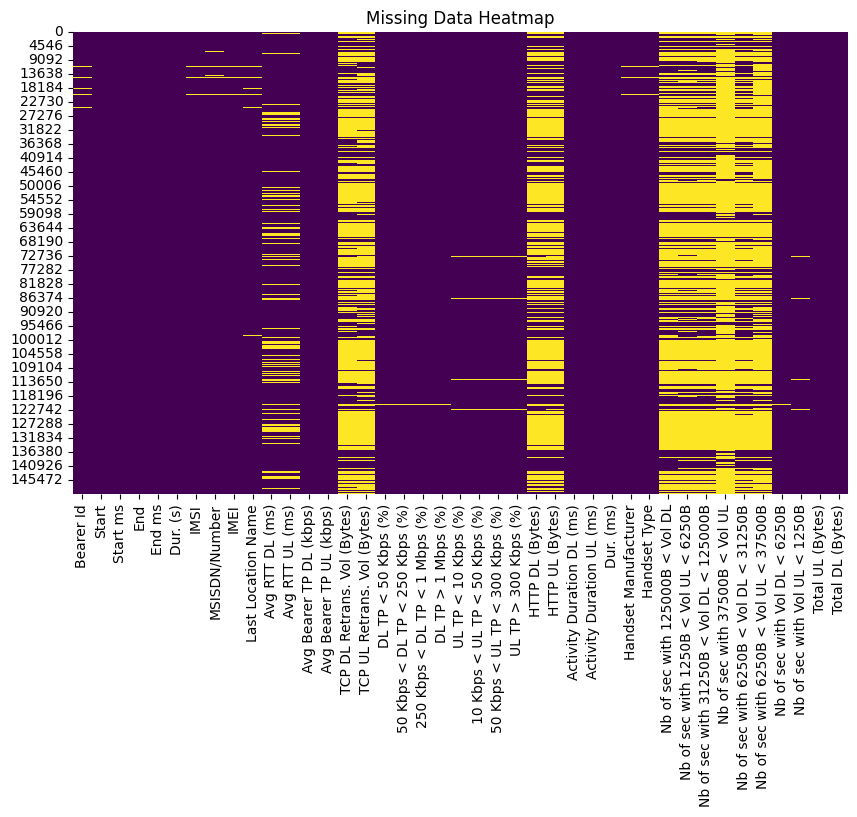

In [15]:

clom = df.columns[df.isnull().any()].to_list()
# Create a boolean mask
missing_data = df[clom].isnull()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(missing_data, cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

- Handling Missing values

In [26]:
# Check the columns total rows of NaN values
nan_in_same_row = df['Bearer Id'].isnull() | df['MSISDN/Number'].isnull()  | df['IMEI'].isnull()  | df['IMSI'].isnull()

# Get the rows where both columns are NaN
rows_with_nan = df[nan_in_same_row]

# Display the result
print("Rows where these columns have NaN values:")
print(rows_with_nan.shape)


Rows where both columns have NaN values:
(1495, 55)


In [19]:
# Specify the columns to drop
columns_to_check = ['Bearer Id', 'MSISDN/Number', 'IMSI', 'IMEI']

# Drop rows where any of the specified columns have missing values
df.dropna(subset=columns_to_check, inplace=True)
df.shape

(148506, 55)

In [20]:
# Handling missing Catagorical Data
df['Last Location Name'] = df['Last Location Name'].fillna(df['Last Location Name'].mode()[0])


In [21]:

# Columns around 18% missing values

df['Avg RTT DL (ms)'] = df['Avg RTT DL (ms)'].fillna(df['Avg RTT DL (ms)'].median())
df['Avg RTT UL (ms)'] = df['Avg RTT UL (ms)'].fillna(df['Avg RTT UL (ms)'].median())


In [22]:
# Columns below 1% missing values
columns_to_fill = [  'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'Nb of sec with Vol DL < 6250B', 'Nb of sec with Vol UL < 1250B',
      ]
df[columns_to_fill] = df[columns_to_fill].fillna(df[columns_to_fill].median())

In [23]:
## columns with more than 50% missing values that are useful for next tasks 
cols_to_impute = ['TCP DL Retrans. Vol (Bytes)',  'TCP UL Retrans. Vol (Bytes)']

imputer = IterativeImputer(random_state=0)
df[cols_to_impute] = imputer.fit_transform(df[cols_to_impute])


# # Initialize KNN Imputer
# knn_imputer = KNNImputer(n_neighbors=3)
# # Impute only the selected columns
# df[cols_to_impute] = knn_imputer.fit_transform(df[cols_to_impute])
# Verify imputation
print(df[cols_to_impute].isnull().sum())



TCP DL Retrans. Vol (Bytes)    0
TCP UL Retrans. Vol (Bytes)    0
dtype: int64


In [24]:
# # The rest of the Columns with more than 50% missing values
columns_to_impute = [
    'Nb of sec with 37500B < Vol UL',
    'Nb of sec with 6250B < Vol UL < 37500B',
    'Nb of sec with 125000B < Vol DL',
    'Nb of sec with 31250B < Vol DL < 125000B',
    'Nb of sec with 1250B < Vol UL < 6250B',
    'Nb of sec with 6250B < Vol DL < 31250B',
    'HTTP UL (Bytes)',
    'HTTP DL (Bytes)'
]


simple_imputer = SimpleImputer(strategy='median')
df[columns_to_impute] = simple_imputer.fit_transform(df[columns_to_impute])

In [25]:
df.describe()

,Bearer Id,Start,Start ms,End,End ms,Dur. (s),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms),Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,1.485060e+05,148506,148506.000000,148506,148506.000000,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05,148506.000000,148506.000000,148506.000000,148506.000000,1.485060e+05,1.485060e+05,148506.000000,148506.000000,148506.000000,148506.000000,148506.000000,148506.000000,148506.000000,148506.000000,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05,148506.000000,148506.000000,148506.000000,148506.000000,148506.000000,148506.000000,148506.000000,148506.000000,1.485060e+05,148506.000000,1.485060e+05,1.485060e+05,1.485060e+05,148506.000000,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05
mean,1.014676e+19,2019-04-26 12:40:48.378247424,499.205143,2019-04-27 17:52:12.953012480,498.640196,1.050841e+05,2.082016e+14,4.190654e+10,4.850068e+13,94.811031,15.279901,13287.521413,1770.598488,2.100477e+07,7.663761e+05,92.904159,3.037049,1.705541,1.602649,98.540773,0.771295,0.147509,0.078812,5.379149e+07,1.612980e+06,1.837842e+06,1.414773e+06,1.050846e+08,433.147947,163.231317,411.734482,26.754225,571.952190,42.195117,3716.114642,4014.954372,1.795144e+06,32922.085512,5.751770e+06,2.056293e+06,1.791785e+06,467403.486896,1.163387e+07,1.100857e+07,1.162724e+07,1.100190e+07,4.220642e+08,8.289600e+06,4.211525e+08,8.262685e+06,4.111937e+07,4.546640e+08
min,6.917538e+18,2019-04-04 12:01:00,0.000000,2019-04-24 22:59:00,0.000000,7.142000e+03,2.040471e+14,3.360100e+10,4.400152e+11,0.000000,0.000000,0.000000,0.000000,2.000000e+00,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000e+01,4.000000e+01,0.000000e+00,0.000000e+00,7.142988e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.200000e+01,0.000000,2.070000e+02,3.000000e+00,1.400000e+01,2.000000,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06
25%,7.349883e+18,2019-04-25 00:47:00,250.000000,2019-04-26 07:36:00,251.000000,5.824875e+04,2.082014e+14,3.365131e+10,3.546071e+13,35.000000,3.000000,43.000000,47.000000,1.410988e+06,6.582400e+04,91.000000,0.000000,0.000000,0.000000,99.000000,0.000000,0.000000,0.000000,2.007958e+06,2.359060e+05,1.484800e+04,2.149900e+04,5.824964e+07,131.000000,53.000000,168.000000,8.000000,293.000000,8.000000,87.000000,106.000000,8.990445e+05,16431.000000,2.883393e+06,1.023967e+06,8.926208e+05,233445.000000,5.833290e+06,5.515832e+06,5.778898e+06,5.476774e+06,2.104765e+08,4.130680e+06,2.103042e+08,4.144179e+06,3.321828e+07,2.431263e+08
50%,7.349883e+18,2019-04-26 08:52:00,499.000000,2019-04-27 23:04:00,500.000000,8.639900e+04,2.082015e+14,3.366371e+10,3.572231e+13,45.000000,5.000000,63.000000,62.000000,2.100477e+07,7.663761e+05,100.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,2.007958e+06,2.359060e+05,3.901850e+04,4.648100e+04,8.639999e+07,131.00

In [48]:
# Change Date format 
df['Start'] =  pd.to_datetime(df['Start'])
df['End'] =  pd.to_datetime(df['End'])

In [27]:
missing_values_table(df)

Your selected dataframe has 55 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values,Dtype,Values,Unique Values


In [28]:
non_missing_values_table(df)

Your selected DataFrame has 55 columns.
There are 55 columns that have no missing values.


,Column Name,Data Type,Total Values,Unique Values
0,Bearer Id,float64,148506,134255
1,Start,datetime64[ns],148506,9988
2,Start ms,float64,148506,1000
3,End,datetime64[ns],148506,6401
4,End ms,float64,148506,1000
5,Dur. (s),float64,148506,88816
6,IMSI,float64,148506,106470
7,MSISDN/Number,float64,148506,106471
8,IMEI,float64,148506,106477
9,Last Location Name,object,148506,45379


### Outlier 

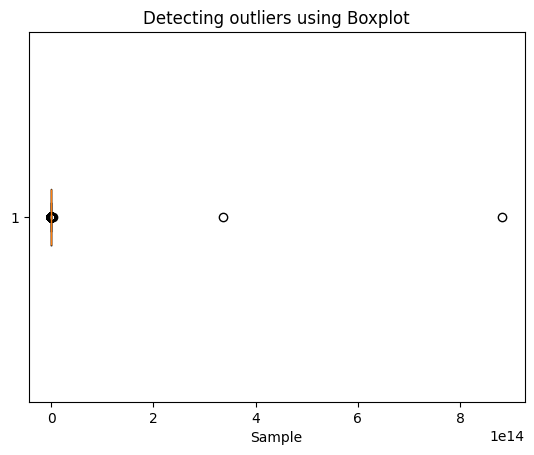

In [61]:
# 
plt.boxplot(df['MSISDN/Number'], vert=False)
plt.title("Detecting outliers using Boxplot")
plt.xlabel('Sample')
plt.show()

In [45]:
# Function to handle outliers using IQR
def handle_outliers_iqr(df, threshold = 1.5):
    dff = df.copy()
    numeric_cols = dff.select_dtypes(include=['number']).columns

    for col in numeric_cols:
        Q1 = df[col].quantile(0.1)
        Q3 = df[col].quantile(0.9)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        
        

        # Cap outliers 
        dff[col] = np.where(df[col] > upper_bound, upper_bound, dff[col])
        dff[col] = np.where(df[col] < lower_bound, lower_bound, dff[col])

    return dff

# Handle outliers
df_cleaned = handle_outliers_iqr(df)


In [41]:
df_cleaned.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (s),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms),Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,2019-04-04 12:01:00,770.0,2019-04-25 14:35:00,662.0,244958.75,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,42.0,5.0,23.0,44.0,2.100477e+07,766376.076867,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,2007958.0,235906.0,37624.0,38787.0,244958792.0,Samsung,Samsung Galaxy A5 Sm-A520F,131.0,53.0,168.0,8.0,293.0,8.0,213.0,214.0,1545765.0,24420.0,1634479.0,1271433.0,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,2019-04-09 13:04:00,235.0,2019-04-25 08:15:00,606.0,244958.75,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,65.0,5.0,16.0,26.0,2.100477e+07,766376.076867,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,2007958.0,235906.0,168.0,3560.0,244958792.0,Samsung,Samsung Galaxy J5 (Sm-J530),131.0,53.0,168.0,8.0,293.0,8.0,971.0,1022.0,1926113.0,7165.0,3493924.0,920172.0,629046.0,308339.0,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,2019-04-09 17:42:00,1.0,2019-04-25 11:58:00,652.0,244958.75,2.082008e+14,3.373182e+10,3.528151e+13,D42335A,45.0,5.0,6.0,9.0,2.100477e+07,766376.076867,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,2007958.0,235906.0,0.0,0.0,244958792.0,Samsung,Samsung Galaxy A8 (2018),131.0,53.0,168.0,8.0,293.0,8.0,751.0,695.0,1684053.0,42224.0,8535055.0,1694064.0,2690151.0,672973.0,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,2019-04-10 00:31:00,486.0,2019-04-25 07:36:00,171.0,244958.75,2.082014e+14,3.373182e+10,3.535661e+13,T21824A,45.0,5.0,44.0,44.0,2.100477e+07,766376.076867,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,2007958.0,235906.0,3330.0,37882.0,244958792.0,undefined,undefined,131.0,53.0,168.0,8.0,293.0,8.0,17.0,207.0,644121.0,13372.0,9023734.0,2788027.0,1439754.0,631229.0,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,2019-04-12 20:10:00,565.0,2019-04-25 10:40:00,954.0,244958.75,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,45.0,5.0,6.0,9.0,2.100477e+07,766376.076867,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,2007958.0,235906.0,0.0,0.0,244958792.0,Samsung,Samsung Sm-G390F,131.0,53.0,168.0,8.0,293.0,8.0,607.0,604.0,862600.0,50188.0,6248284.0,1500559.0,1936496.0,173853.0,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [42]:
df_cleaned.describe()

,Bearer Id,Start,Start ms,End,End ms,Dur. (s),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms),Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,1.485060e+05,148506,148506.000000,148506,148506.000000,148506.000000,1.485060e+05,1.485060e+05,1.485060e+05,148506.000000,148506.000000,148506.000000,148506.000000,1.485060e+05,1.485060e+05,148506.000000,148506.000000,148506.000000,148506.0,148506.000000,148506.0,148506.0,148506.0,148506.0,148506.0,1.485060e+05,1.485060e+05,1.485060e+05,148506.0,148506.0,148506.0,148506.0,148506.0,148506.0,148506.000000,148506.000000,1.485060e+05,148506.000000,1.485060e+05,1.485060e+05,1.485060e+05,148506.000000,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05
mean,1.014676e+19,2019-04-26 12:40:48.378247424,499.205143,2019-04-27 17:52:12.953012480,498.640196,100018.863263,2.082015e+14,3.366912e+10,4.850068e+13,51.530928,8.152627,11093.233018,702.320502,1.462535e+07,5.433096e+05,94.656495,2.215688,0.635395,0.0,99.312203,0.0,0.0,0.0,2007958.0,235906.0,4.309730e+05,3.813939e+05,1.000194e+08,131.0,53.0,168.0,8.0,293.0,8.0,1674.416145,1552.836034,1.795144e+06,32922.085512,5.751770e+06,2.056293e+06,1.791785e+06,467403.486896,1.163387e+07,1.100857e+07,1.162724e+07,1.100190e+07,4.220642e+08,8.289600e+06,4.211525e+08,8.262685e+06,4.111935e+07,4.546640e+08
min,6.917538e+18,2019-04-04 12:01:00,0.000000,2019-04-24 22:59:00,0.000000,7142.000000,2.082008e+14,3.360301e+10,4.400152e+11,0.000000,0.000000,0.000000,0.000000,2.000000e+00,1.000000e+00,77.500000,0.000000,0.000000,0.0,97.500000,0.0,0.0,0.0,2007958.0,235906.0,0.000000e+00,0.000000e+00,7.142988e+06,131.0,53.0,168.0,8.0,293.0,8.0,1.000000,1.000000,1.200000e+01,0.000000,2.070000e+02,3.000000e+00,1.400000e+01,2.000000,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,9.496909e+06,7.114041e+06
25%,7.349883e+18,2019-04-25 00:47:00,250.000000,2019-04-26 07:36:00,251.000000,58248.750000,2.082014e+14,3.365131e+10,3.546071e+13,35.000000,3.000000,43.000000,47.000000,1.410988e+06,6.582400e+04,91.000000,0.000000,0.000000,0.0,99.000000,0.0,0.0,0.0,2007958.0,235906.0,1.484800e+04,2.149900e+04,5.824964e+07,131.0,53.0,168.0,8.0,293.0,8.0,87.000000,106.000000,8.990445e+05,16431.000000,2.883393e+06,1.023967e+06,8.926208e+05,233445.000000,5.833290e+06,5.515832e+06,5.778898e+06,5.476774e+06,2.104765e+08,4.130680e+06,2.103042e+08,4.144179e+06,3.321828e+07,2.431263e+08
50%,7.349883e+18,2019-04-26 08:52:00,499.000000,2019-04-27 23:04:00,500.000000,86399.000000,2.082015e+14,3.366371e+10,3.572231e+13,45.000000,5.000000,63.000000,62.000000,2.100477e+07,7.663761e+05,100.000000,0.000000,0.000000,0.0,100.000000,0.0,0.0,0.0,2007958.0,235906.0,3.901850e+04,4.648100e+04,8.639999e+07,131.0,53.0,168.0,8.0,293.0,8.0,201.000000,216.000000,1.793860e+06,32917.000000,5.767399e+06,2.054222e+06,1.793642e+06,466419.000000,1.161596e+07,1.101232e+07,1.164238e+07,1.099937e+07,4.234669e+08,8.291650e+06,4.218618e+08,8.266016e+06,4.114196e+07,4.559408

In [49]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148506 entries, 0 to 149999
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   Bearer Id                                 148506 non-null  float64       
 1   Start                                     148506 non-null  datetime64[ns]
 2   Start ms                                  148506 non-null  float64       
 3   End                                       148506 non-null  datetime64[ns]
 4   End ms                                    148506 non-null  float64       
 5   Dur. (s)                                  148506 non-null  float64       
 6   IMSI                                      148506 non-null  float64       
 7   MSISDN/Number                             148506 non-null  float64       
 8   IMEI                                      148506 non-null  float64       
 9   Last Location Name  

In [50]:
df_cleaned.to_csv('../data/df_cleaned.csv', index=False)